# An Evaluating of Google Play Store Apps 

Identifying best Apps from various categories 

# Table of Contents:
1. Importing Lbraries

2. Uploading data

3. Features

4. Data Cleaning 

    4.1 Dropping rows with missing values
    
    4.2 Removing unecessary signs and simbols from the dataset
    
    
5. Exploratory Data Analysis 

    5.1 Checking for Muilticolinearity
    
    5.2 Dropping strongly correlated variables in order to avoid confounding effects
    

6. Data Preparation
    

7. Modelling 

8. Conclusion

# Executive Summary

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

Business problem: Identifying the best Apps in different categories. This is an important question from the business perspective, as it can help companies to understand the customer's current needs are, including costumer's profiling, target audience for certain types os Apps, and feedback for improving currently existing applications. 

# 1. Importing Libraries

In [1]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.figure_factory as ff
import seaborn as sns 
color = sns.color_palette()

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree

# Statistics
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

# Sklearn - model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Sklearn - linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

from sklearn.feature_selection import RFE

import itertools
from vecstack import stacking


import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
import random

%matplotlib inline

from mlxtend.plotting import plot_decision_regions
# Binarising our target variable
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# 2. Uploading Data

In [2]:
data = pd.read_csv('googleplaystore.csv') # uploads the data in the notebook
x=data #attributes the data also to the value of x for future programming 
data.head(5) #shows the top 5 data rows and all columns in the data grid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3. Features

 
1. App Name
2. Category
3. Rating (1-5)
4. Number of Reviews
5. Size
6. Number of Insltallations 
7. Type (free or Paid)
8. Price
9. Content Rating (Age Appropriate)
10. Genres
11. Last Update
12. Current Version
13. Android Version 

# 4. Data Cleaning

In [3]:
data.info() #shows the number of rows and columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.shape #identifies which columns have null values and how many there are

(10841, 13)

In [5]:
data.Rating.max()# exploring scores on the Rating category 

19.0

 Whilst exploring the data, it was observed that the maximum score in the Rating category was 19. This contradicts the rating system, which establishes 5 as the maximim possible score. 

In [6]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


There is a clear problem with row 10472, hence the row was shifted to the right by one position. 

In [7]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [8]:
data.isnull().sum()# identifies which columns have null values and how many there are

App                  0
Category             2
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
data["Category"].fillna("PHOTOGRAPHY", inplace = True) #As the name of the App clealry indicates which category it belongs to. 
data["Type"].fillna("Free", inplace = True) #As it is the most common type (over 92%)

In [9]:
# observing the remainder missing values 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,2,0.000184
Category,2,0.000184
Genres,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000


# 4.1 Dropping  rows with missing values 

In [10]:
df1 = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
# Assessing the number of paid vs free apps
print("Free Apps",len(df1[df1['Type'] == "Free"]))
print("Paid Apps",len(df1[df1['Type'] == "Paid"]))

Free Apps 8714
Paid Apps 645


In [12]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.2 Removing unecessary signs and simbols from the dataset

In [13]:
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('k',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('+',''))

In [52]:
df1['App'] = df2['App'].apply(lambda x: str(x).replace("?"," "))
df1['App'] = df2['App'].apply(lambda x: str(x).replace("&"," "))
df1['App'] = df2['App'].apply(lambda x: str(x).replace("'"," "))
df1['App'] = df2['App'].apply(lambda x: str(x).replace("-"," "))
df1['App'] = df2['App'].apply(lambda x: str(x).replace(","," "))

In [15]:
df1["Category"]=[each.replace("_"," ") for each in df1.Category]
df1["Price"]=[each.replace("$"," ") for each in df1.Price]

In [16]:
# removing more unecessary simbols and signs from the data set
df1.Installs = df1.Installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df1.Installs = df1.Installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df1.Installs = df1.Installs.apply(lambda x: int(x))

In [56]:
df1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1318
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

df1['Android Ver'] = df1['Android Ver'].apply(lambda x: str(x).replace('W', ''))
df1['Android Ver'] = df1['Android Ver'].apply(lambda x: str(x).replace(' and up', ''))
df1['Android Ver'] = df1['Android Ver'].apply(lambda x: str(x).replace('Varies with device', ''))

In [17]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
df1.Size=df1.Size.replace('Varies with device', df1.mean())
df1.Size=df1.Size.replace('1,000+',1000)

In [19]:
# coercing errors
df1.Reviews = pd.to_numeric(df1.Reviews, errors='coerce')
df1.Rating = pd.to_numeric(df1.Rating, errors='coerce')

In [20]:
df1.info()#reassessing the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 10840
Data columns (total 13 columns):
App               9359 non-null object
Category          9359 non-null object
Rating            9359 non-null float64
Reviews           9359 non-null int64
Size              9359 non-null object
Installs          9359 non-null int64
Type              9359 non-null object
Price             9359 non-null object
Content Rating    9359 non-null object
Genres            9359 non-null object
Last Updated      9359 non-null object
Current Ver       9359 non-null object
Android Ver       9359 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 1.3+ MB


In [21]:
df2 = df1
df2.shape

(9359, 13)

In [22]:
df2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
# Reset Index Values
df2.reset_index(drop=True, inplace=True)

# 5. Exploratory Data Analysis 

In [24]:
df2.columns # Assessing the features for the exploratory data analysis 

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# 5.1 Checking for Muilticolinearity

Linear models analyses whether one or more predictor variables explain the dependent (criterion) variable.  The regression has five key assumptions: Linear relationship, Multivariate normality, No or little multicollinearity, No auto-correlation, and Homoscedasticity. Moreover, the sample size rule of thumb is that the regression analysis requires at least 20 cases per independent variable in the analysis.

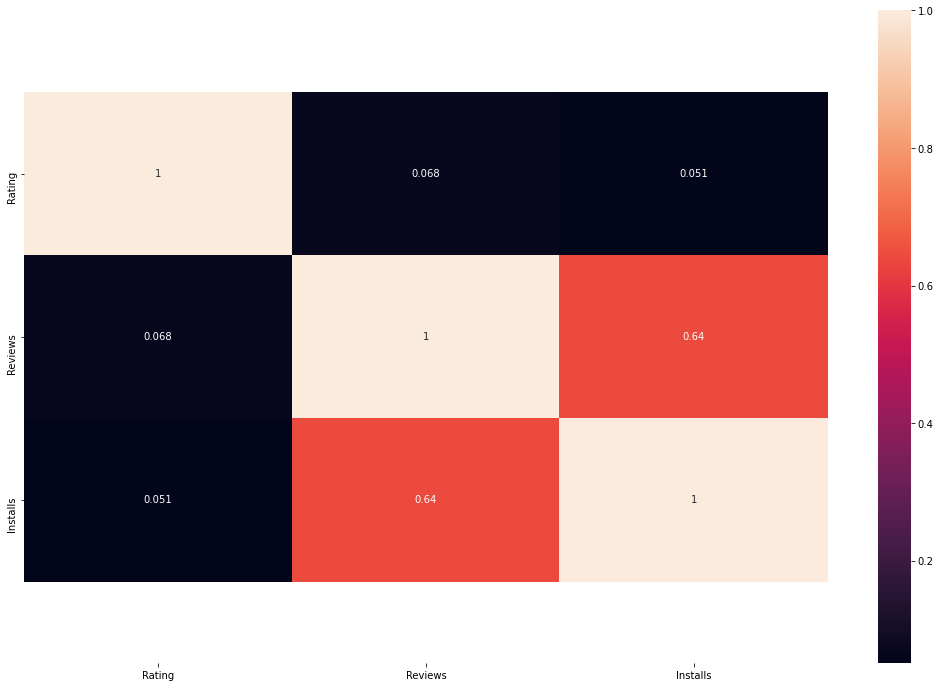

In [25]:
cor_df2 = df2.corr().nlargest(50,'Rating')['Rating'].index
f , ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(df2[cor_df2].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [26]:
print(df2.corr())

            Rating   Reviews  Installs
Rating    1.000000  0.068114  0.051283
Reviews   0.068114  1.000000  0.641606
Installs  0.051283  0.641606  1.000000


# 5.2 Dropping strongly correlated variables in order to avoid confounding effects

In [27]:
# Correlation matrix
corr_matrix = df2.corr().abs()

In [28]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [29]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [30]:
to_drop

[]

Multicolinearity assumption was met! 

Text(0.5, 1.0, 'TOTAL apps in each category')

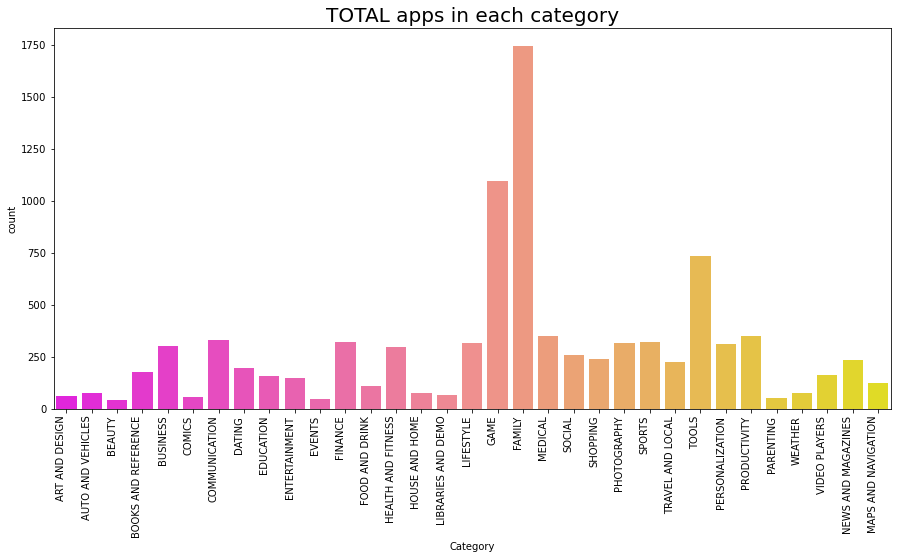

In [31]:
rcParams['figure.figsize'] = 15,7
category_plot = sns.countplot(x="Category",data=df2, palette = "spring")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot 
plt.title('TOTAL apps in each category',size = 20)

It can be seen in the above graph, that the most popular App category is Family, and the least popular is the Evetns Category. Amongst the most popular are Games, Medical, tools and photography.  

Text(0.5, 1.0, 'Content Rating distribution')

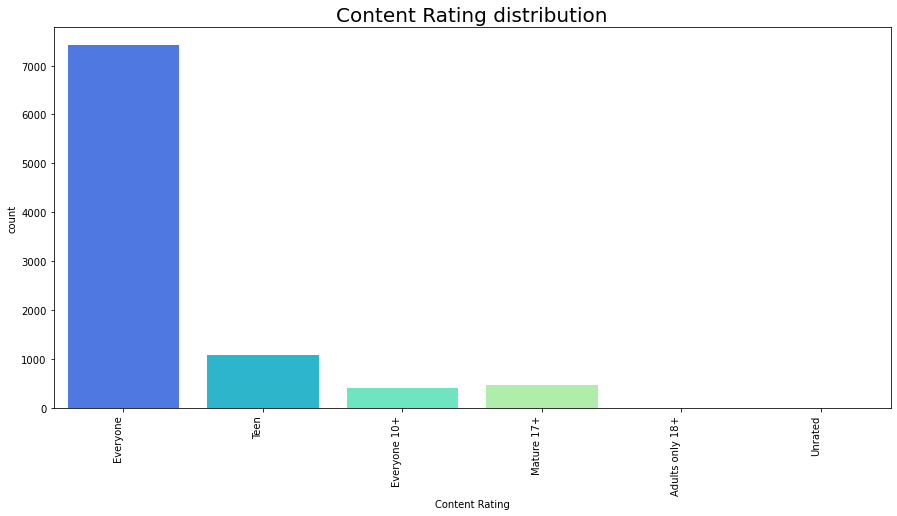

In [32]:
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=df2, palette = "rainbow")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)

 
Everyone, Teen Content Rating comprise the majority of ratings across all apps. Conversely, Unrated and Adults ony 18+ have account of the least amounts of ratings.

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

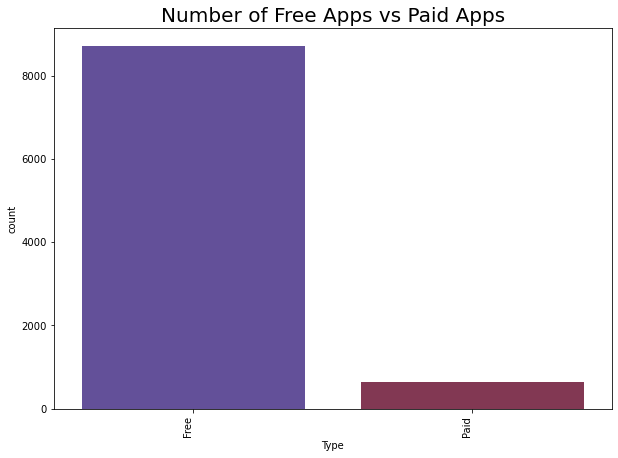

In [33]:
rcParams['figure.figsize'] = 10,7
type_plot = sns.countplot(x="Type", data=df2, palette = "twilight")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)


The number of free of charge apps totals up to 7588, whereas the number of paid apps sums up to 602.

Text(0.5, 1.0, 'Number of apps for every price')

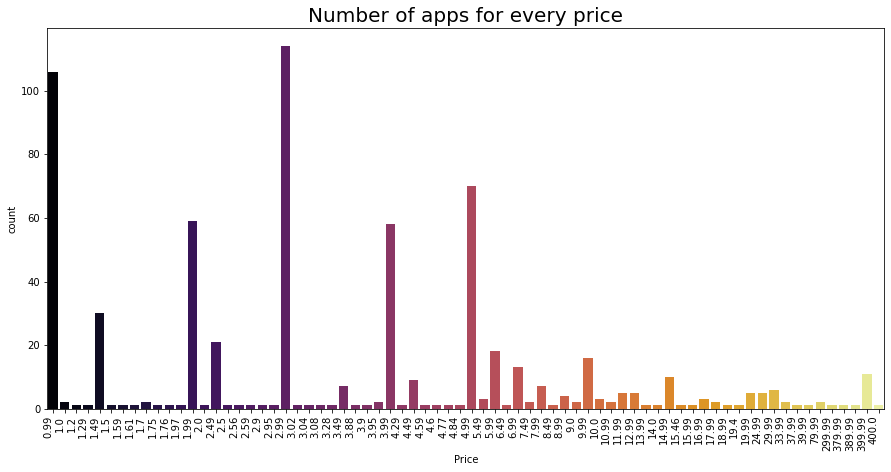

In [34]:
df2['Price'] = df2['Price'].apply(lambda x: float(x))
rcParams['figure.figsize'] = 15,7
priced_apps=df2[df2['Price'] != 0.0]
price_plot = sns.countplot(priced_apps['Price'], palette = "inferno")
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
price_plot 
plt.title('Number of apps for every price',size = 20)

#
The above graph contains information specific to the Paid Apps type. 
There is a clear preference in price chosen for the paid apps. They include: 0.99, 2.99, 4.99, 1.99, and 3.99 US Dollars. 

Text(0.5, 1.0, 'Installs count distribution')

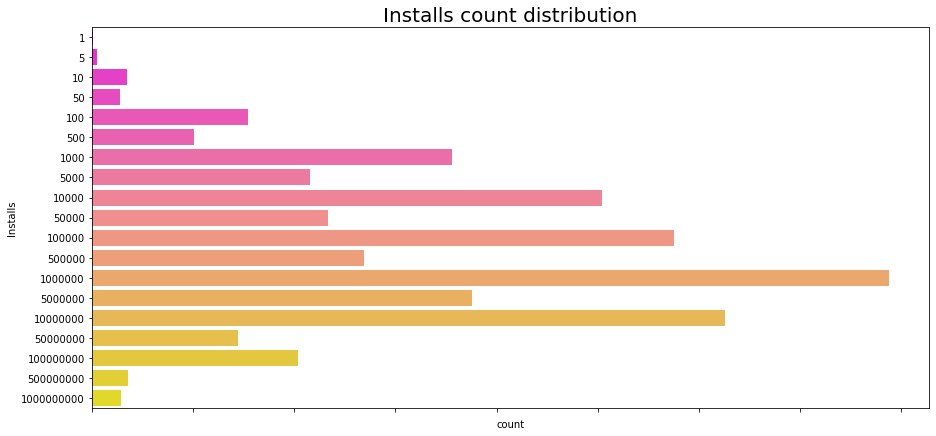

In [35]:
rcParams['figure.figsize'] = 15,7
install_plot = sns.countplot(y="Installs",data=df2, palette = "spring")
install_plot.set_xticklabels(install_plot.get_xticklabels(), rotation=90, ha="right")
install_plot 
plt.title('Installs count distribution',size = 20)


Most of the apps in the dataframe have 1 million installs followed by 10 million and 100k.

Text(0.5, 1.0, 'Rating Distribution')

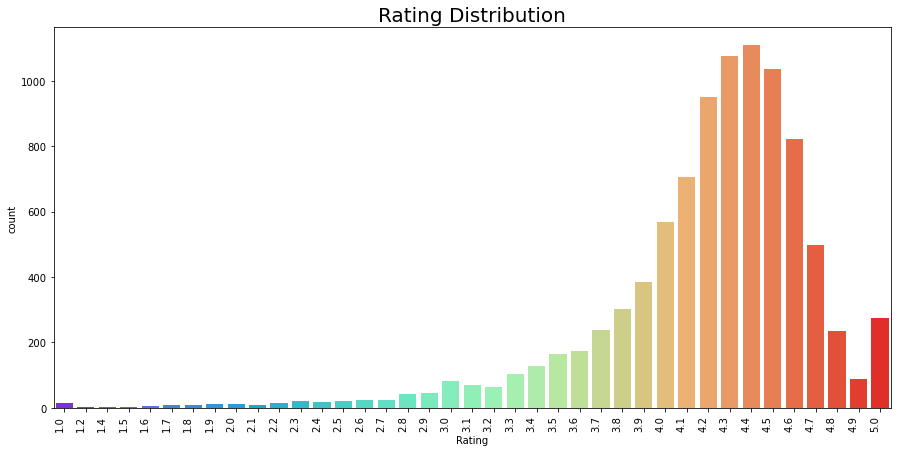

In [36]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="Rating",data=df2, palette = "rainbow")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Rating Distribution',size = 20)


The Ratings distribution skewed to the left, with most of the apps are rated between 4.0 and 4.7.

Text(0.5, 1.0, 'Most Reviewed Apps at Google Play Store')

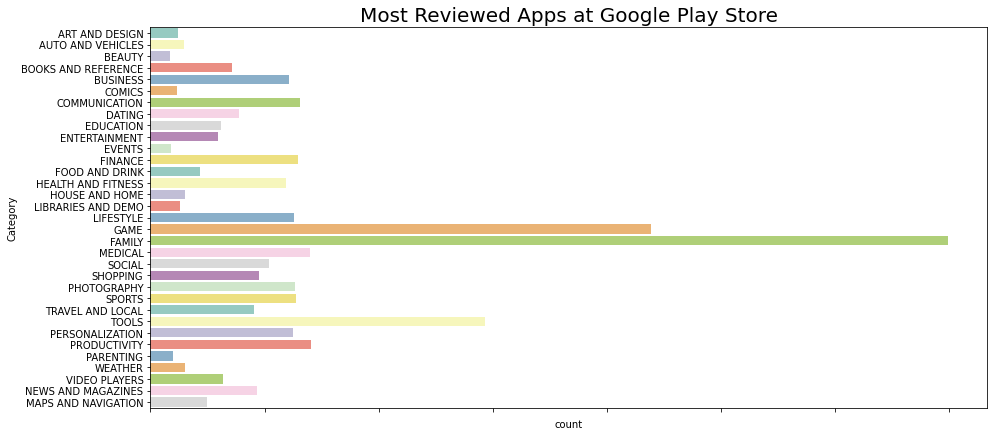

In [37]:
rcParams['figure.figsize'] = 15,7
likeable_apps = sns.countplot(y="Category",data=df2, palette = "Set3")
likeable_apps.set_xticklabels(likeable_apps.get_xticklabels(), rotation=90, ha="right")
likeable_apps 
plt.title('Most Reviewed Apps at Google Play Store',size = 20)


Most reviewed apps include Family, Game, Tools, Finance, Lide style and medical apps. 

In [54]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid ScrapBook,ART AND DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide ...,ART AND DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch Draw Paint,ART AND DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [160]:
df2.App.nunique()

8187

In [57]:
df2.drop(columns=['Android Ver'], inplace=True)

In [59]:
df2.drop(columns=['Current Ver'], inplace=True)

In [61]:
df2.drop(columns=['Last Updated'], inplace=True)

In [94]:
df2_categorical = pd.get_dummies(df2, columns=['Category', 'Type', 'Genres', 'Content Rating'], drop_first=True)

In [95]:
df2_categorical.head()

,App,Rating,Reviews,Size,Installs,Price,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor Candy Camera Grid ScrapBook,4.1,159,19,10000,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14,500000,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,U Launcher Lite – FREE Live Cool Themes Hide ...,4.7,87510,8.7,5000000,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Sketch Draw Paint,4.5,215644,25,50000000,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw Number Art Coloring Book,4.3,967,2.8,100000,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
df2_categorical.set_index(keys='App', inplace=True)
df2_categorical.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor Candy Camera Grid ScrapBook,4.1,159,19,10000,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Coloring book moana,3.9,967,14,500000,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
U Launcher Lite – FREE Live Cool Themes Hide Apps,4.7,87510,8.7,5000000,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Sketch Draw Paint,4.5,215644,25,50000000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Pixel Draw Number Art Coloring Book,4.3,967,2.8,100000,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [97]:
df2_size_median = df2_categorical.loc[df2_categorical.Size!='Varies with device']
df2_size_median = df2_size_median.Size.median()

In [98]:
df2_categorical.loc[df2_categorical.Size == 'Varies with device', 'Size'] = df2_size_median

In [99]:
df2_categorical.describe()

,Rating,Reviews,Installs,Price,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
count,9359.000000,9.359000e+03,9.359000e+03,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,...,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000
mean,4.191805,5.142693e+05,1.789998e+07,0.961382,0.007800,0.004488,0.019019,0.032375,0.006197,0.035046,...,0.016882,0.000214,0.000321,0.008014,0.002992,0.792072,0.042419,0.049257,0.115824,0.000107
std,0.515281,3.145174e+06,9.126730e+07,15.822482,0.087977,0.066843,0.136599,0.177004,0.078482,0.183907,...,0.128837,0.014618,0.017902,0.089164,0.054618,0.405847,0.201554,0.216417,0.320031,0.010337
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.865000e+02,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,5.950000e+03,5.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,8.157850e+04,5.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
for col in df2_categorical.columns:
    print(col)
    print(df2_categorical[col].isna().sum())

Rating
0
Reviews
0
Size
0
Installs
0
Price
0
Category_AUTO AND VEHICLES
0
Category_BEAUTY
0
Category_BOOKS AND REFERENCE
0
Category_BUSINESS
0
Category_COMICS
0
Category_COMMUNICATION
0
Category_DATING
0
Category_EDUCATION
0
Category_ENTERTAINMENT
0
Category_EVENTS
0
Category_FAMILY
0
Category_FINANCE
0
Category_FOOD AND DRINK
0
Category_GAME
0
Category_HEALTH AND FITNESS
0
Category_HOUSE AND HOME
0
Category_LIBRARIES AND DEMO
0
Category_LIFESTYLE
0
Category_MAPS AND NAVIGATION
0
Category_MEDICAL
0
Category_NEWS AND MAGAZINES
0
Category_PARENTING
0
Category_PERSONALIZATION
0
Category_PHOTOGRAPHY
0
Category_PRODUCTIVITY
0
Category_SHOPPING
0
Category_SOCIAL
0
Category_SPORTS
0
Category_TOOLS
0
Category_TRAVEL AND LOCAL
0
Category_VIDEO PLAYERS
0
Category_WEATHER
0
Type_Paid
0
Genres_Action;Action & Adventure
0
Genres_Adventure
0
Genres_Adventure;Action & Adventure
0
Genres_Adventure;Brain Games
0
Genres_Adventure;Education
0
Genres_Arcade
0
Genres_Arcade;Action & Adventure
0
Genres_Arca

# Neural Network Regression 

# 6. Data Preparation 

In [137]:
# drop target variable
X=df2_categorical.drop('Rating',axis=1)
y=df2_categorical['Rating'].values


In [138]:
X.shape, y.shape

((9359, 156), (9359,))

In [139]:
# split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [140]:
# Train validation split
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=52)

# 7.Modelling

# K-fold / Cross Validation Model

In [141]:
regression = LinearRegression()
regression.fit(X_train_v, y_train_v)
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train_v, y_train_v,scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.028274444711913083


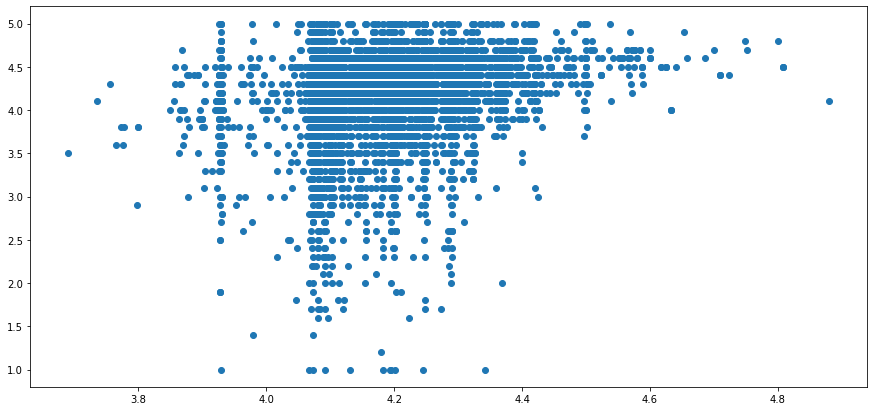

In [142]:
plt.scatter(regression.predict(X_train_v) ,y_train_v, )
plt.show()

# Statsmodule OLS model

In [106]:
X_const_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_const_train).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Model 2

In [143]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train_v, y_train_v, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.028274444711913083


In [108]:
est = sm.OLS(y, X.astype(float)).fit()
X_const = sm.add_constant(X_train_v)

model1 = sm.OLS(y_train, X_const).fit()
model1.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Model 3

In [46]:
est = sm.OLS(y, X.astype(float)).fit()
X_const = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_const).fit()
model2.summary()

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'

# Decision Tree Regression

In [109]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [153]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=25)
regr_2 = DecisionTreeRegressor(max_depth=25)
regr_1.fit(X_train_v, y_train_v)
regr_2.fit(X_train_v, y_train_v)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=25,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [154]:
# Predict
y_1 = regr_1.predict(X_train_v)
y_2 = regr_2.predict(X_train_v)

In [155]:
len(y_train_v)

5989

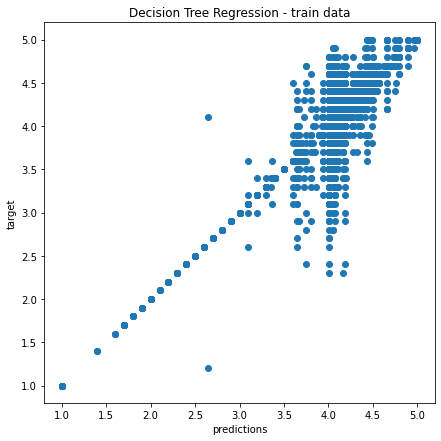

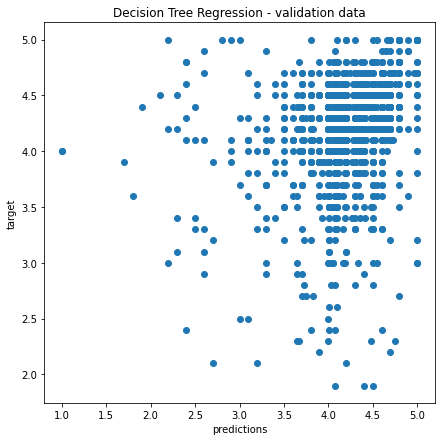

In [156]:
plt.figure(figsize=(7,7))
plt.scatter(y_1, y_train_v)
plt.xlabel("predictions")
plt.ylabel("target")
plt.title("Decision Tree Regression - train data")
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(regr_1.predict(X_val), y_val)
plt.xlabel("predictions")
plt.ylabel("target")
plt.title("Decision Tree Regression - validation data")
plt.show()

In [158]:
tree_1_eval = np.mean(cross_val_score(regr_1, X_train_v, y_train_v, scoring='r2', cv=crossvalidation))
tree_1_eval

-0.47516662133835813

ConversionError: Failed to convert value(s) to axis units: array(['87', '3.9', '48', ..., '33', '52', '11'], dtype=object)

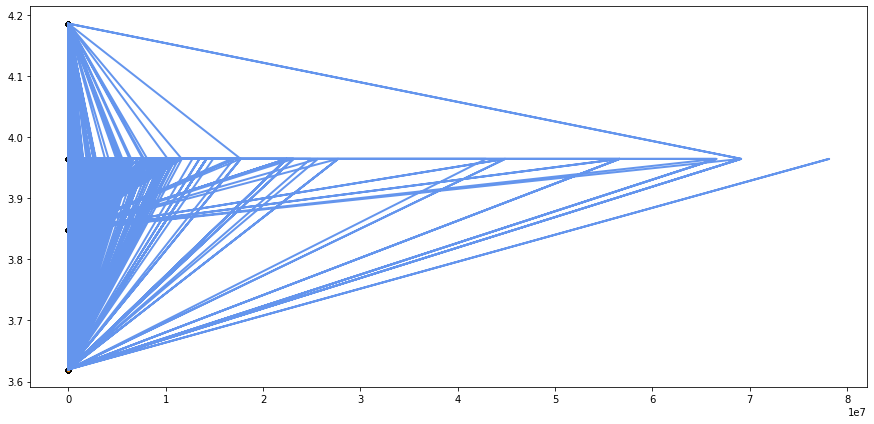

In [125]:
# Plot the results
plt.figure()
plt.scatter(y_train_v, y_1, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_train_v, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_train_v, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()